In [1]:
library(data.table)

In [2]:
library(ggplot2)

In [3]:
i = 1:55

In [4]:
n = 55

# Hypothesis 3

In [5]:
entity_edits_and_misalignment_hypothesis_3 <- read.table("../../../results/entity_categorization/hypothesis_3.tsv", header=TRUE, sep="\t")

In [6]:
entity_edits_and_misalignment_hypothesis_3 <- data.table(entity_edits_and_misalignment_hypothesis_3)

In [7]:
summary(entity_edits_and_misalignment_hypothesis_3)

   file_date      lower_quality_bot_edits lower_quality_semi_automated_edits
 Min.   :201211   Min.   :       41       Min.   :       0                  
 1st Qu.:201379   1st Qu.: 29258527       1st Qu.:   64331                  
 Median :201502   Median : 86781551       Median :  142746                  
 Mean   :201474   Mean   : 79318474       Mean   : 2801436                  
 3rd Qu.:201604   3rd Qu.:124385598       3rd Qu.: 3169511                  
 Max.   :201706   Max.   :154729481       Max.   :15928110                  
 lower_quality_non_bot_edits lower_quality_anon_edits higher_quality_bot_edits
 Min.   :   71386            Min.   :   149           Min.   :       0        
 1st Qu.: 4479178            1st Qu.:232141           1st Qu.:  668225        
 Median :15193706            Median :490520           Median : 2079058        
 Mean   :17645501            Mean   :460805           Mean   : 7010006        
 3rd Qu.:30622042            3rd Qu.:687993           3rd Qu.:1391

In [8]:
# Remove last entry since edit data from last month is only for (part of?) first day
sorted_entity_edits_and_misalignment_hypothesis_3 <- dplyr::arrange(entity_edits_and_misalignment_hypothesis_3, file_date)[1:55,]

In [9]:
head(sorted_entity_edits_and_misalignment_hypothesis_3)

file_date,lower_quality_bot_edits,lower_quality_semi_automated_edits,lower_quality_non_bot_edits,lower_quality_anon_edits,higher_quality_bot_edits,higher_quality_semi_automated_edits,higher_quality_non_bot_edits,higher_quality_anon_edits
201211,41,0,71386,149,0,0,0,0
201212,18743,18905,259315,1389,0,0,0,0
201301,257643,33873,314756,2090,0,0,0,0
201302,658404,39454,408842,2971,0,0,0,0
201303,1029258,43822,600789,7601,0,1,388,3
201304,2907170,51540,1087357,29196,11,2,470,4


In [10]:
hypothesis_3_misaligned_higher_quality_human_edits = data.table(i = i, n = n)

In [11]:
hypothesis_3_misaligned_lower_quality_human_edits = data.table(i = i, n = n)

In [12]:
attach(sorted_entity_edits_and_misalignment_hypothesis_3)

In [13]:
hypothesis_3_misaligned_higher_quality_human_edits$p <- ((higher_quality_non_bot_edits+higher_quality_anon_edits)/(higher_quality_bot_edits + higher_quality_semi_automated_edits + higher_quality_non_bot_edits + higher_quality_anon_edits))

In [14]:
hypothesis_3_misaligned_lower_quality_human_edits$p <- ((lower_quality_non_bot_edits+lower_quality_anon_edits)/(lower_quality_bot_edits + lower_quality_semi_automated_edits + lower_quality_non_bot_edits + lower_quality_anon_edits))

In [15]:
detach(sorted_entity_edits_and_misalignment_hypothesis_3)

In [16]:
hypothesis_3_misaligned_higher_quality_human_edits$se = sqrt((hypothesis_3_misaligned_higher_quality_human_edits$p*(1-hypothesis_3_misaligned_higher_quality_human_edits$p))/n)

In [17]:
hypothesis_3_misaligned_lower_quality_human_edits$se = sqrt((hypothesis_3_misaligned_lower_quality_human_edits$p*(1-hypothesis_3_misaligned_lower_quality_human_edits$p))/n)

In [18]:
hypothesis_3_misaligned_higher_quality_human_edits$group = "misaligned_higher_quality_human_edits"
hypothesis_3_misaligned_lower_quality_human_edits$group = "misaligned_lower_quality_human_edits"

In [19]:
grouped_hypothesis_3.dt = rbind(hypothesis_3_misaligned_higher_quality_human_edits, hypothesis_3_misaligned_lower_quality_human_edits)

In [20]:
grouped_hypothesis_3.dt$group = factor(grouped_hypothesis_3.dt$group)

Warning message:
“Removed 4 rows containing missing values (geom_path).”Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

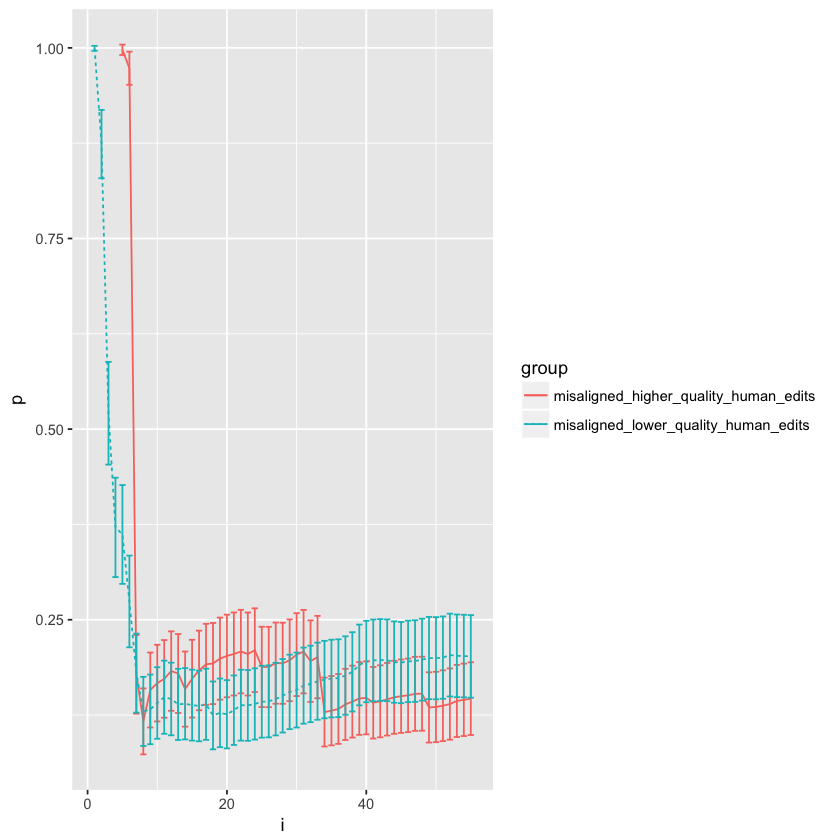

In [21]:
ggplot(grouped_hypothesis_3.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)

# Hypothesis 3a

In [22]:
hypothesis_3a_misaligned_higher_quality_non_bot_edits = data.table(i = i, n = n)

In [23]:
hypothesis_3a_misaligned_lower_quality_non_bot_edits = data.table(i = i, n = n)

In [24]:
attach(sorted_entity_edits_and_misalignment_hypothesis_3)

In [25]:
hypothesis_3a_misaligned_higher_quality_non_bot_edits$p <- ((higher_quality_non_bot_edits)/(higher_quality_bot_edits + higher_quality_semi_automated_edits + higher_quality_non_bot_edits + higher_quality_anon_edits))

In [26]:
hypothesis_3a_misaligned_lower_quality_non_bot_edits$p <- ((lower_quality_non_bot_edits)/(lower_quality_bot_edits + lower_quality_semi_automated_edits + lower_quality_non_bot_edits + lower_quality_anon_edits))

In [27]:
detach(sorted_entity_edits_and_misalignment_hypothesis_3)

In [28]:
hypothesis_3a_misaligned_higher_quality_non_bot_edits$se = sqrt((hypothesis_3a_misaligned_higher_quality_non_bot_edits$p*(1-hypothesis_3a_misaligned_higher_quality_non_bot_edits$p))/n)

In [29]:
hypothesis_3a_misaligned_lower_quality_non_bot_edits$se = sqrt((hypothesis_3a_misaligned_lower_quality_non_bot_edits$p*(1-hypothesis_3a_misaligned_lower_quality_non_bot_edits$p))/n)

In [30]:
hypothesis_3a_misaligned_higher_quality_non_bot_edits$group = "misaligned_higher_quality_non_bot_edits"
hypothesis_3a_misaligned_lower_quality_non_bot_edits$group = "misaligned_lower_quality_non_bot_edits"

In [31]:
grouped_hypothesis_3a.dt = rbind(hypothesis_3a_misaligned_higher_quality_non_bot_edits, hypothesis_3a_misaligned_lower_quality_non_bot_edits)

In [32]:
grouped_hypothesis_3a.dt$group = factor(grouped_hypothesis_3a.dt$group)

Warning message:
“Removed 4 rows containing missing values (geom_path).”Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

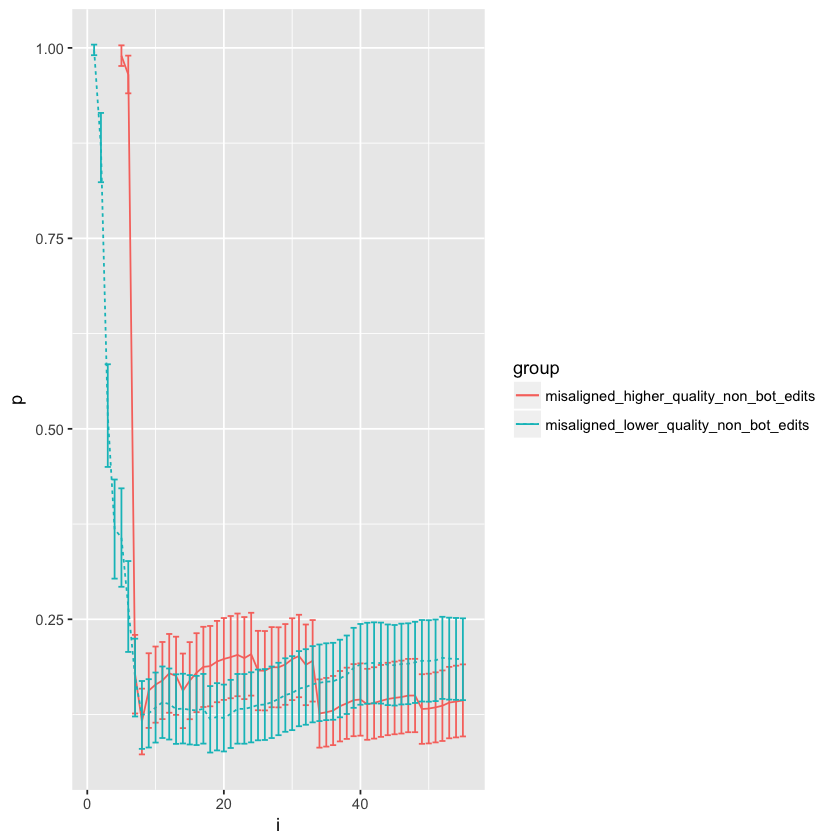

In [33]:
ggplot(grouped_hypothesis_3a.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)

# Hypothesis 3b

In [34]:
hypothesis_3b_misaligned_higher_quality_anon_edits = data.table(i = i, n = n)

In [35]:
hypothesis_3b_misaligned_lower_quality_anon_edits = data.table(i = i, n = n)

In [36]:
attach(sorted_entity_edits_and_misalignment_hypothesis_3)

In [37]:
hypothesis_3b_misaligned_higher_quality_anon_edits$p <- ((higher_quality_anon_edits)/(higher_quality_bot_edits + higher_quality_semi_automated_edits + higher_quality_non_bot_edits + higher_quality_anon_edits))

In [38]:
hypothesis_3b_misaligned_lower_quality_anon_edits$p <- ((lower_quality_anon_edits)/(lower_quality_bot_edits + lower_quality_semi_automated_edits + lower_quality_non_bot_edits + lower_quality_anon_edits))

In [39]:
detach(sorted_entity_edits_and_misalignment_hypothesis_3)

In [40]:
hypothesis_3b_misaligned_higher_quality_anon_edits$se = sqrt((hypothesis_3b_misaligned_higher_quality_anon_edits$p*(1-hypothesis_3b_misaligned_higher_quality_anon_edits$p))/n)

In [41]:
hypothesis_3b_misaligned_lower_quality_anon_edits$se = sqrt((hypothesis_3b_misaligned_lower_quality_anon_edits$p*(1-hypothesis_3b_misaligned_lower_quality_anon_edits$p))/n)

In [42]:
hypothesis_3b_misaligned_higher_quality_anon_edits$group = "misaligned_higher_quality_anon_edits"
hypothesis_3b_misaligned_lower_quality_anon_edits$group = "misaligned_lower_quality_anon_edits"

In [43]:
grouped_hypothesis_3b.dt = rbind(hypothesis_3b_misaligned_higher_quality_anon_edits, hypothesis_3b_misaligned_lower_quality_anon_edits)

In [44]:
grouped_hypothesis_3b.dt$group = factor(grouped_hypothesis_3b.dt$group)

Warning message:
“Removed 4 rows containing missing values (geom_path).”Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

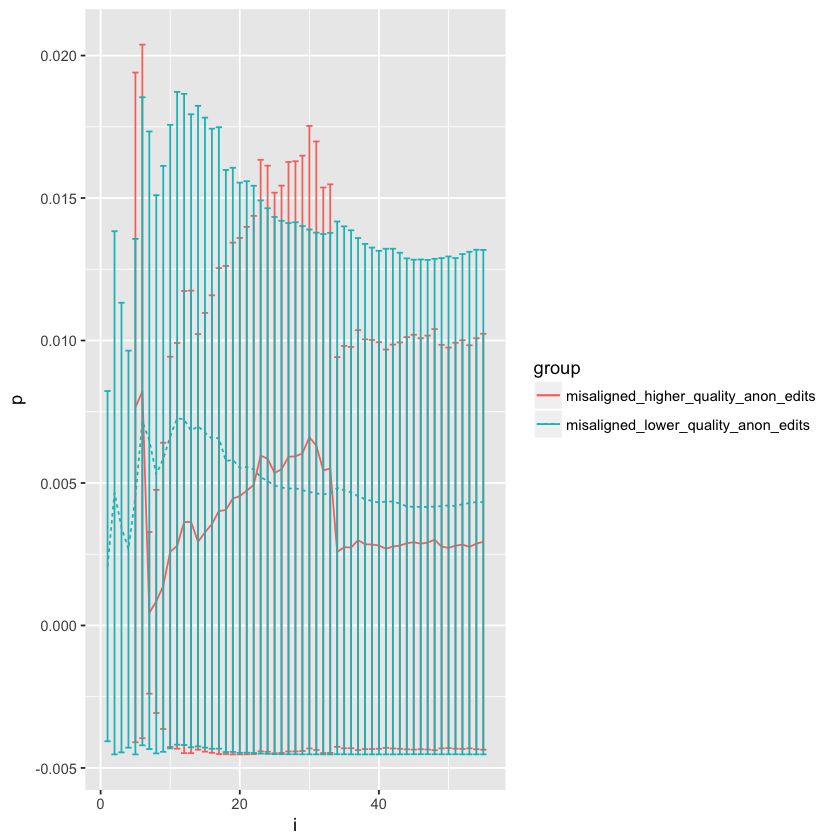

In [45]:
ggplot(grouped_hypothesis_3b.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)